In [ ]:
# Plot population as a function of birthrate or vice versa
# Calc aging population as an envitability of birth rate stagnation 
# how bad is the problem and how long does it last as a function of our current population trends
# if it continues to stagnate, if it decreases
# Large reduction of pop? Events: infectious disease (old people too), pompeii (regardless of age) 
# How many people have ever lived on earth?

In [ ]:
# !pip install pandas openpyxl

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [40]:
# World Pop

df = pd.read_excel('./pop/worldpop_worldometer.xlsx', engine='openpyxl')

# Extract columns A and B (assuming these columns are labeled in the first row)
wp_years = df.iloc[:, 0].to_numpy()  # Column A (first column)
wp_values = df.iloc[:, 1].to_numpy()  # Column B (second column)



In [41]:
# Global Life Expectency

# URL of the life-expectancy CSV file
path = './pop/life-expectancy.filtered/life-expectancy.csv'

df = pd.read_csv(path)
le_years = df.iloc[:, 0].to_numpy()  # First column
le_values = df.iloc[:, 1].to_numpy()  # Second column


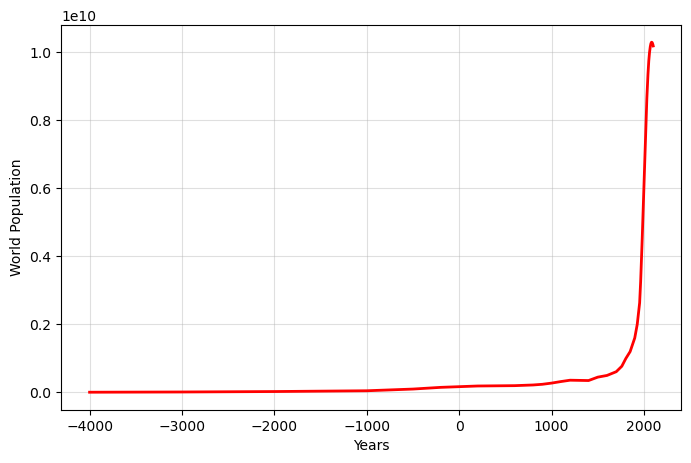

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(wp_years, wp_values,color='r', linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1,100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

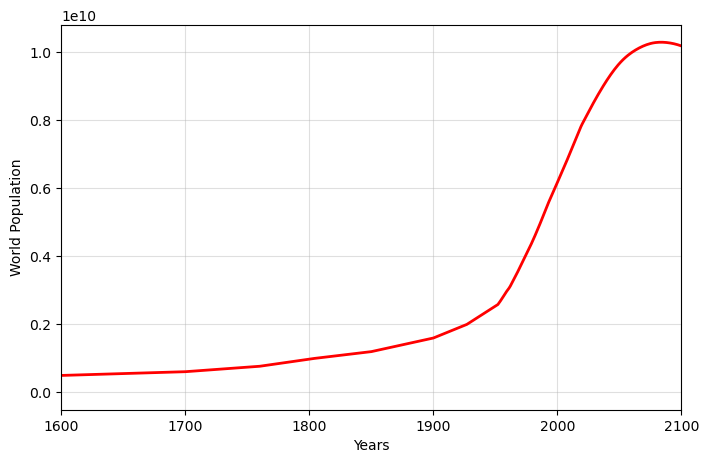

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(wp_years, wp_values,color='r', linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
plt.xlim(1600,2100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

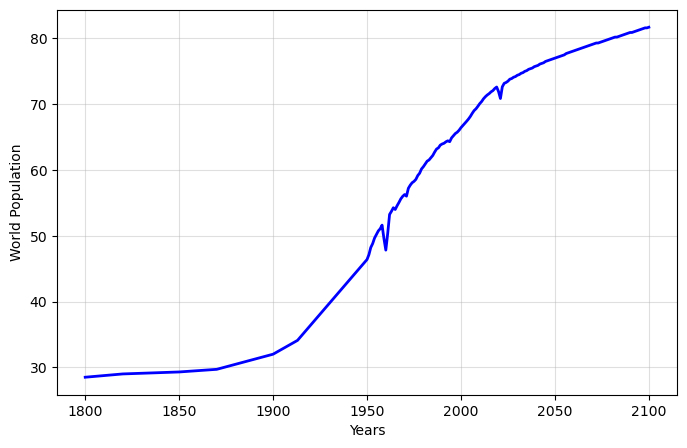

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(le_years, le_values,color='b', linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1,100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

In [60]:
# World Pop interpolation and trimming
# Cut range to 1800-2100 and linearily interpolate 1 year increments
# Interpolate data from last point before 1800, which is 1760 up to 2100
# remove 18 values before
wp_years_int = np.arange(1760,2100)
wp_values_int = np.interp(wp_years_int, wp_years[18:], wp_values[18:])

#Remove 40 values before new interpolated values before 1800
wp_years_int = wp_years_int[40:]
wp_values_int = wp_values_int[40:]

# Life Expectancy World Pop and Trimming 
le_years_int = np.arange(1800,2100)
le_values_int = np.interp(le_years_int, le_years, le_values)

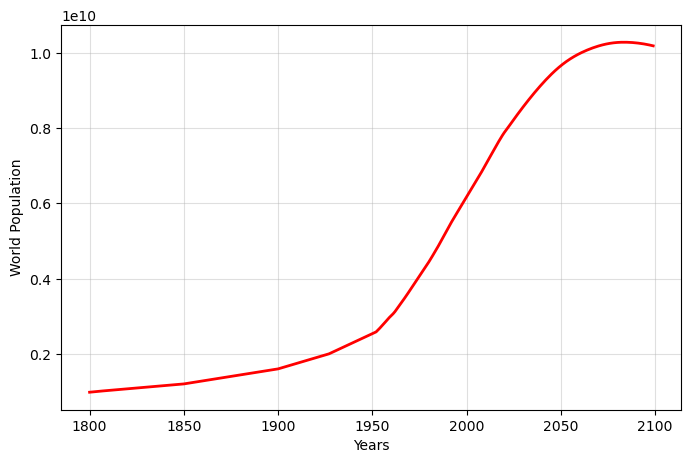

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(wp_years_int, wp_values_int,color='r', linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1600,2100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

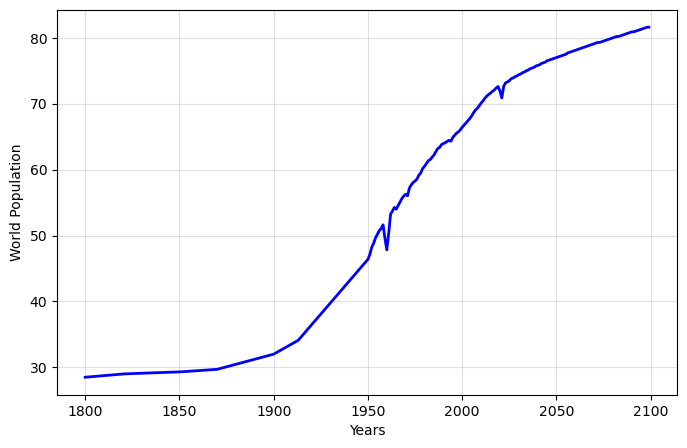

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(le_years_int, le_values_int,color='b', linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1,100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

In [63]:
# Calculate first- and second-order derivative of world population 
dx = 1
# Change in world pop
dwpdy = np.gradient(wp_values_int, dx) 
# Accelation in world pop
d2wpd2y = np.gradient(dwpdy, dx) 

In [64]:
colors = cm.plasma(np.linspace(0.2, 0.8, 3))

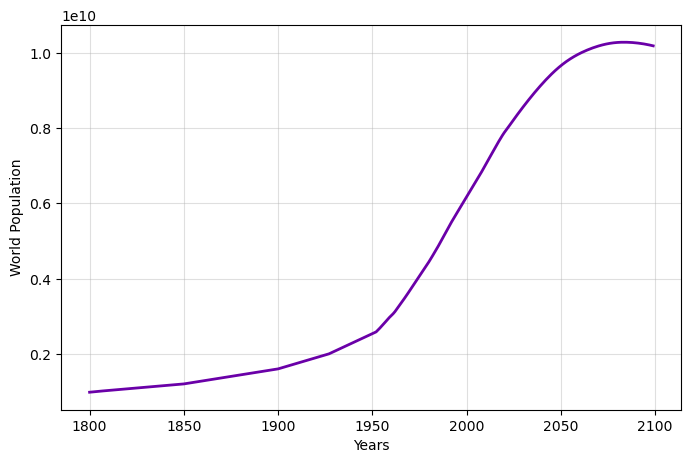

In [65]:
plt.figure(figsize=(8, 5))
plt.plot(wp_years_int, wp_values_int,color=colors[0], linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1600,2100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

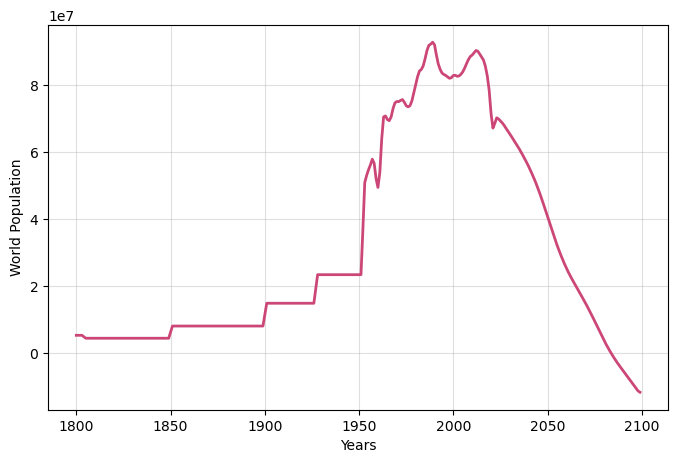

In [66]:
# Change in population / birth_rate - death_rate 

plt.figure(figsize=(8, 5))
plt.plot(wp_years_int, dwpdy,color=colors[1], linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1600,2100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

In [67]:
# Zero Crossing : first stagnation / decline of world population
wp_zero_crossing = np.where(np.diff(np.sign(dwpdy)))[0]
print('Year of World Pop Stagnation:', wp_years_int[wp_zero_crossing][0])

Year of World Pop Stagnation: 2083


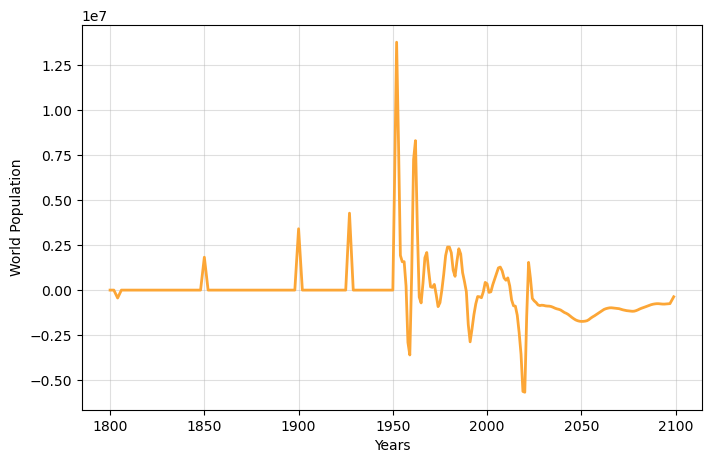

In [68]:
plt.figure(figsize=(8, 5))
plt.plot(wp_years_int, d2wpd2y,color=colors[2], linewidth=2)
plt.xlabel("Years")
plt.ylabel("World Population")
# plt.title("")
# plt.xlim(1600,2100)
# plt.ylim(0,1.05)
plt.grid(alpha=0.4)  
plt.show()

In [69]:
# What if you integrated world pop and devide by integral life expectancy 
# Amount of people who lived 